<a href="https://colab.research.google.com/github/faridLim/Data-analysis/blob/main/StrategyScore_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from pandas import DataFrame
import matplotlib.pyplot as plt

In [ ]:
start_date = '2018-12-28'
end_date = '2021-05-31'
needed_date = '2017-12-05'

In [ ]:
df_stock = pd.read_excel("/content/gdrive/Shareddrives/mirae/data/data/etf_close.xlsx", index_col = 0)
df_volume = pd.read_excel("/content/gdrive/Shareddrives/mirae/data/data/etf_volume.xlsx", index_col = 0)

In [ ]:
df_volume = df_volume.fillna(0)

In [ ]:
columns_lst = df_stock.columns
date = df_stock.T.columns
date_list = []
score_list = []

In [ ]:
date

DatetimeIndex(['2012-01-02', '2012-01-03', '2012-01-04', '2012-01-05',
               '2012-01-06', '2012-01-09', '2012-01-10', '2012-01-11',
               '2012-01-12', '2012-01-13',
               ...
               '2021-06-10', '2021-06-11', '2021-06-14', '2021-06-15',
               '2021-06-16', '2021-06-17', '2021-06-18', '2021-06-21',
               '2021-06-22', '2021-06-23'],
              dtype='datetime64[ns]', name='date', length=2333, freq=None)

In [ ]:
for i in range(len(date)):
    ts = date[i].date()
    date_list.append(str(ts))

start_date_idx = date_list.index('2018-12-28')
end_date_idx = date_list.index('2021-05-31')

In [ ]:
df_high52= pd.DataFrame()
for i in range(columns_lst.shape[0]):
    high52 = df_stock[columns_lst[i]].asfreq('D').rolling(window=52 * 7, min_periods=1).max()
    df_high52[columns_lst[i]] = high52

In [ ]:
df_merge = pd.merge(df_stock,df_high52, how= 'left', on = 'date')
df_merge = df_merge.filter(regex = '_y')
df_merge.columns = columns_lst
#df_merge.to_excel('etf_high52.xlsx')

In [ ]:
boxScore_df = pd.DataFrame(columns= columns_lst)
gapScore_df = pd.DataFrame(columns= columns_lst)
volumeScore_df = pd.DataFrame(columns= columns_lst)

In [ ]:
boxScore_lis = []
gapScore_lst = []
volumeScore_lst = []

In [ ]:
def high52_check():
    avg_stockprice = df_stock[name][start_date_idx-2-260:start_date_idx-2].mean()

    before3month_df_stock = df_stock.iloc[start_date_idx - 20 *3 :start_date_idx-1][name]
    before3month_df_merge = df_merge.iloc[start_date_idx - 20 *3 :start_date_idx-1][name]

    before3month_df_stock = pd.DataFrame(before3month_df_stock)
    before3month_df_merge = pd.DataFrame(before3month_df_merge)
    df_filter1 = pd.concat([before3month_df_stock, before3month_df_merge], axis =1)
    df_filter1.columns= ['close', '52high']
    df_filter1.reset_index(inplace = True)

    for i in range(df_filter1.shape[0]):
    
        if df_filter1.loc[i, 'close'] < df_filter1.loc[i, '52high'] and avg_stockprice < df_filter1.loc[i, 'close']:
            box_point.append(1)
        else:
            box_point.append(-1)

    df_filter1['box_point'] = box_point
    sum_box_point = sum(box_point)
    c.append([name,sum_box_point])
    # sorted_c_list = sorted(c, key=lambda x: -x[1])
    box_point.clear()

main

In [ ]:
for date_idx in range(start,len(date_list)):
    i = 0
    a = [] # df_high52 만들 때 사용
    b = [] # 52주 신고가 여력 트리거
    c = [] # point 계산
    box_point = []
    point_vol = [] # volume에 대한 point
    filter2_columns_lst = [] # 필터링2 이후 리스트
    gap_list = [] # 52주 신고가 대비 현재 주가가 얼마나 근접하였는지
    filter3_columns_lst = [] # 필터링 3 이후 리스트, 필터링 2를 MDD기준으로 내림차순 전개
    start_date_idx = date_idx

    #52_check , boxscore
    for k in range(len(columns_lst)):
        b.clear()
        name = columns_lst[k]
        for i in range(100): # 20일 x 5개월
            after_value = df_merge.iloc[start_date_idx-i-1][name]
            before_value = df_merge.iloc[start_date_idx-1-i-1][name]
            if after_value != before_value:
                b.append(1)
        if 1 in b:
            high52_check()
        else:
            c.append([name,-50])


    box_score = c
    
    #gap score
    for i in range(len(columns_lst)):
        high = df_merge[columns_lst[i]][start_date_idx-2]
        close_price = df_stock[columns_lst[i]][start_date_idx-1]
        gap = (high-close_price) / high
        gap_list.append([columns_lst[i],gap])

    
    #volume score
    for i in range(len(columns_lst)):
        if df_volume[columns_lst[i]][start_date_idx] == 0:
            vol_point = 0
            point_vol.append([columns_lst[i], vol_point])
            continue
        
        for k in range(260): # 52주 x 5일
            after_value_idx = start_date_idx-4-k
            after_value = df_merge.iloc[after_value_idx][columns_lst[i]]
            before_value = df_merge.iloc[after_value_idx-1][columns_lst[i]]
            if after_value != before_value:
                A_vol = df_volume[columns_lst[i]][after_value_idx-2] +  df_volume[columns_lst[i]][after_value_idx-1]+  df_volume[columns_lst[i]][after_value_idx] +  df_volume[columns_lst[i]][after_value_idx+1]+  df_volume[columns_lst[i]][after_value_idx+2]
                filter_vol = df_volume[columns_lst[i]][start_date_idx-1]

                if A_vol > filter_vol > A_vol * 0.5:
                    vol_point = 2
                    point_vol.append([columns_lst[i], vol_point])
                    break
                if A_vol * 0.5 > filter_vol:
                    vol_point = 1
                    point_vol.append([columns_lst[i], vol_point])
                    break
                if filter_vol > A_vol:
                    vol_point = 0
                    point_vol.append([columns_lst[i], vol_point])
                    break
            
     #box scrore 정규화#
    
    boxscore_df = pd.DataFrame(box_score)
    boxscore_df.columns = ['name', date_list[date_idx]]
    box_mean = boxscore_df.describe().at['mean', date_list[date_idx]]
    box_std = boxscore_df.describe().at['std', date_list[date_idx]]
    boxscore_df[date_list[date_idx]] = (boxscore_df[date_list[date_idx]] - box_mean) / box_std
    boxscore_df.set_index('name', inplace = True)
    boxscore_df = boxscore_df.T
   

    #gap_score 정규화#
    gapscore_df = pd.DataFrame(gap_list)
    gapscore_df.columns = ['name', date_list[date_idx]]
    gapscore_mean = gapscore_df.describe().at['mean', date_list[date_idx]]
    gapscore_std = gapscore_df.describe().at['std', date_list[date_idx]]
    gapscore_df[date_list[date_idx]] = (gapscore_df[date_list[date_idx]] - gapscore_mean) / gapscore_std

    gapscore_df.set_index('name', inplace = True)
    gapscore_df = gapscore_df.T
    

    #point_vol 정규화#
    point_vol_df = pd.DataFrame(point_vol)
    point_vol_df.columns = ['name', date_list[date_idx]]
    point_vol_mean = point_vol_df.describe().at['mean', date_list[date_idx]]
    point_vol_std = point_vol_df.describe().at['std', date_list[date_idx]]
    if point_vol_std == 0:
        point_vol_df[date_list[date_idx]] = 0
    else:
        point_vol_df[date_list[date_idx]] = (point_vol_df[date_list[date_idx]] - point_vol_mean) / point_vol_std

    point_vol_df.set_index('name', inplace = True)
    point_vol_df = point_vol_df.T
    

    score_df = boxscore_df - gapscore_df + point_vol_df
    score_df = score_df.T
    
    score_list.append(score_df)
        

In [ ]:
score_list = pd.concat(score_list, axis = 1)
score_t = score_list.T
score_t.head()

name,A091220,A091230,A098560,A102110,A105010,A114820,A117690,A123310,A123320,A130680,A133690,A137610,A138520,A138530,A138540,A139220,A139230,A139240,A139250,A139260,A139270,A139280,A139290,A139310,A139320,A143850,A143860,A147970,A150460,A157450,A157490,A157500,A160580,A166400,A174350,A182480,A182490,A192090,A195920,A195930,...,A277650,A289250,A289260,A289480,A292150,A292160,A292560,A300610,A302170,A302180,A302190,A305080,A305540,A307510,A307520,A310960,A310970,A315270,A319640,A329200,A329750,A341850,A357870,A360750,A364960,A364970,A364980,A364990,A365000,A365040,A371160,A371450,A371460,A371470,A376410,A377990,A381170,A381180,A387270,A387280
2019-01-02,-0.413504,-1.938229,3.392552,-0.258345,-0.037092,4.811512,-0.450040,4.423964,-1.661471,-0.581575,1.962566,0.072055,0.366376,-0.321176,0.290803,0.016501,2.762139,-1.054029,-0.418384,-0.608203,-0.464286,-0.050775,-0.205831,-0.295017,0.516377,1.232024,-0.681669,-0.285879,0.101800,1.794236,-0.342132,-1.216159,0.028611,0.039891,0.215634,3.073031,3.743302,-1.175592,-0.294910,1.842357,...,-0.026772,-2.098369,-2.043943,0.838973,1.855293,0.138553,2.990104,0.292039,1.505906,1.176631,3.391917,2.547099,0.907731,1.739811,0.074157,-0.750366,1.416007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,-0.393071,-3.681660,3.527992,-0.228847,0.149869,4.840937,-0.449312,4.559747,-1.623137,1.316892,2.080972,-1.695246,0.305678,-0.312403,0.135396,-0.026123,2.702136,-1.036440,-0.506437,-0.577860,-0.452035,-0.069683,-0.229205,-0.205001,2.446280,1.229443,-0.674695,1.512909,0.059526,1.757547,-0.333503,-1.239140,0.139954,0.050118,0.215404,4.947020,3.741579,-1.091102,-0.273437,-0.133786,...,-0.069828,-1.856905,0.003841,-1.044256,-1.952204,0.122319,3.128071,-1.478477,1.527546,1.215684,3.423303,4.539466,0.769243,1.750843,0.201048,1.361673,1.304797,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-04,-0.310744,-3.941545,3.673986,-0.222329,0.550900,4.861097,-0.360471,4.653527,-1.598146,-0.380426,2.028725,0.193730,0.198361,-0.287577,0.350836,0.040876,2.873631,-0.890465,-0.566177,-0.669907,-0.350969,0.001519,-0.111587,-0.251577,0.639296,1.160415,-0.715230,1.693782,0.047476,1.691371,-0.256498,-1.202044,0.065989,0.054894,2.307090,3.002982,3.685735,-1.037109,-0.281868,-0.127286,...,-0.009075,-2.063874,-0.000454,2.797959,-0.203236,0.127545,5.501041,0.401305,1.517737,1.217844,3.427771,2.848989,0.573925,1.514325,-0.027296,1.293328,1.246417,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-07,-0.450996,-0.141515,5.606966,-0.251053,0.467463,4.854437,-0.334119,4.480330,-1.636278,-0.390849,1.925298,0.185857,0.076328,-0.359615,0.494201,-0.019674,3.014759,-0.907424,-0.642712,-0.754597,-0.472700,0.035268,-0.026506,-0.366532,2.541845,1.044023,-0.632008,-0.357402,0.034792,1.594325,-0.253964,-1.250147,0.006158,0.010227,0.294109,2.939974,3.603401,-1.035189,-0.299259,-2.104854,...,-0.074148,-2.045169,-0.068805,2.716534,-0.241552,0.089512,3.088651,0.487971,-0.459167,1.206515,3.472710,4.648358,0.630431,1.641379,2.039629,1.313800,1.248633,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-08,-0.608269,-4.144914,3.669577,-0.221348,0.527728,4.883240,-0.344842,4.446301,-1.625808,-0.423856,2.028906,0.184000,0.108017,-0.305801,0.482851,-0.002231,3.040836,-0.929363,-0.545896,-0.632971,-0.541747,-0.042747,-0.102627,-0.207291,2.561361,1.137015,-0.731584,-0.346730,0.017639,1.540420,-0.202901,-1.175193,-2.068257,0.054690,0.229996,3.016505,3.648540,-1.054278,-0.192890,-0.050450,...,-0.055184,-0.041883,-0.010276,0.854168,-0.144195,0.141019,3.001006,0.651673,1.504502,1.205971,5.552012,2.650813,0.790909,1.710047,0.174839,1.493410,1.439276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
score_t.tail()

name,A091220,A091230,A098560,A102110,A105010,A114820,A117690,A123310,A123320,A130680,A133690,A137610,A138520,A138530,A138540,A139220,A139230,A139240,A139250,A139260,A139270,A139280,A139290,A139310,A139320,A143850,A143860,A147970,A150460,A157450,A157490,A157500,A160580,A166400,A174350,A182480,A182490,A192090,A195920,A195930,...,A277650,A289250,A289260,A289480,A292150,A292160,A292560,A300610,A302170,A302180,A302190,A305080,A305540,A307510,A307520,A310960,A310970,A315270,A319640,A329200,A329750,A341850,A357870,A360750,A364960,A364970,A364980,A364990,A365000,A365040,A371160,A371450,A371460,A371470,A376410,A377990,A381170,A381180,A387270,A387280
2021-06-17,4.183314,0.592832,0.337667,1.548889,1.059506,-1.164597,0.466758,-4.861798,1.582649,1.540435,1.300522,0.389982,0.933085,1.020805,1.396477,0.572998,-0.017841,-0.607588,0.931400,0.633477,0.857018,-1.272984,1.309964,0.284302,-1.896939,0.764563,-2.929903,0.982973,0.702628,-0.884204,1.451136,0.630339,-0.987401,1.156113,4.121934,0.592433,0.688897,0.525030,1.542503,0.601143,...,0.624373,1.427275,-1.823865,-2.448845,1.114639,1.467351,-2.087958,0.436407,-1.566196,-1.703659,-1.213836,-2.139314,1.153984,-2.299986,4.564346,1.625851,1.505164,1.076780,-1.926213,0.326696,-1.814750,0.864368,-0.252929,0.814174,0.569232,-3.081819,0.373774,-0.224662,1.407588,4.592293,-3.536369,-1.337346,-0.911761,-0.654987,0.549719,-0.458731,-0.221671,-0.143152,-1.090690,-0.829462
2021-06-18,1.096454,0.794384,0.622232,1.653483,1.168124,-1.000544,0.635787,-4.695209,1.625374,1.369867,1.478919,0.404004,1.062009,1.255102,-1.044918,0.748391,-0.022376,-0.595692,1.152821,0.706491,5.260897,-1.118528,-1.091990,0.405287,-1.941886,0.833323,-2.793373,1.157471,0.909006,-0.710872,1.616119,0.735587,-0.941105,-2.974581,1.034823,0.635305,0.866698,0.676805,1.629001,0.767266,...,0.764807,1.529219,1.528993,-3.377664,1.244923,1.591695,-1.898858,0.526297,-2.420290,1.680313,-1.038985,-1.912810,1.435503,-2.055231,1.469061,1.729431,1.588239,1.273574,-1.984976,0.543938,2.687648,1.032627,-4.327803,0.999532,0.811070,-2.887754,0.642794,-0.137665,1.623134,1.476929,-3.310069,-1.068658,-0.494976,-0.458145,0.712265,-0.315496,-0.010609,0.051287,-0.912191,-0.645788
2021-06-21,0.910583,0.775699,0.540610,1.619381,0.972049,-1.061518,0.596789,-4.755984,1.624467,1.196026,6.202755,-0.004553,1.017653,1.247819,-1.116859,0.748733,-0.029908,-0.677193,1.030844,0.722419,0.849102,-1.162540,-1.150427,0.212507,-2.179440,0.825937,-2.757568,1.070844,0.907220,-0.771474,1.702968,0.647375,-1.085900,1.246345,0.921358,0.623383,5.381575,0.620817,1.504448,0.580946,...,0.736511,1.550531,1.520678,0.812067,1.250970,1.570449,-1.898663,0.648488,-2.805068,-2.970167,-1.079103,-1.956972,1.474708,-1.967530,1.338083,1.696635,-3.002330,1.421634,-2.184162,0.494325,-1.603330,0.967455,-0.142955,0.994273,0.894287,-2.889972,0.687687,-0.125866,1.770426,1.364332,-3.192395,-0.813788,-0.000648,-0.291885,0.756112,-0.159431,0.175332,0.123869,-0.748776,-0.633126
2021-06-22,0.943571,0.873726,0.712435,-0.647012,1.194049,-0.724344,0.819236,-4.508154,-0.750825,1.602545,1.630393,0.401243,-1.272788,1.463988,-0.851167,0.919549,0.306986,-0.646839,1.146305,-1.520679,3.873790,-0.884203,-0.949189,0.245870,-1.923607,0.951717,-2.413360,1.191815,1.019332,-3.431353,1.715422,0.725618,-1.061831,1.457608,1.054187,0.726540,1.101807,0.689156,1.503204,3.592686,...,0.846018,-0.711638,-0.724258,1.061119,-0.969604,-0.669123,-4.537520,0.786588,-0.952638,1.837268,-0.750021,-1.574724,1.719183,-1.538706,4.539342,1.873437,-0.668266,1.367261,-1.943713,0.716828,-1.263122,1.217011,0.173781,4.065563,1.211222,-2.568165,0.929212,-0.039248,1.657765,1.537855,-3.015190,-0.464462,-0.421924,0.079868,0.963146,0.024921,0.196442,0.317376,-0.501637,-0.423960
2021-06-23,1.013505,0.846814,0.759883,-0.649746,1.290626,-0.785470,0.733700,-4.496959,-0.682813,1.733922,1.587236,0.476739,-1.267449,1.463374,-0.679210,1.094827,0.460632,-0.349030,1.238765,-1.546474,1.037530,-0.974535,-0.771897,0.332087,-1.924131,4.770552,-2.483461,1.397594,0.962730,-0

In [ ]:
score_t.to_excel("/content/gdrive/Shareddrives/mirae/외부데이터/score_T(2).xlsx")

기간별 스코어파악

In [ ]:
score = pd.read_excel('/content/gdrive/Shareddrives/mirae/외부데이터/score_T(2).xlsx')

In [ ]:
score.head()

,Unnamed: 0,A091220,A091230,A098560,A102110,A105010,A114820,A117690,A123310,A123320,A130680,A133690,A137610,A138520,A138530,A138540,A139220,A139230,A139240,A139250,A139260,A139270,A139280,A139290,A139310,A139320,A143850,A143860,A147970,A150460,A157450,A157490,A157500,A160580,A166400,A174350,A182480,A182490,A192090,A195920,...,A277650,A289250,A289260,A289480,A292150,A292160,A292560,A300610,A302170,A302180,A302190,A305080,A305540,A307510,A307520,A310960,A310970,A315270,A319640,A329200,A329750,A341850,A357870,A360750,A364960,A364970,A364980,A364990,A365000,A365040,A371160,A371450,A371460,A371470,A376410,A377990,A381170,A381180,A387270,A387280
0,2019-01-02,-0.413504,-1.938229,3.392552,-0.258345,-0.037092,4.811512,-0.450040,4.423964,-1.661471,-0.581575,1.962566,0.072055,0.366376,-0.321176,0.290803,0.016501,2.762139,-1.054029,-0.418384,-0.608203,-0.464286,-0.050775,-0.205831,-0.295017,0.516377,1.232024,-0.681669,-0.285879,0.101800,1.794236,-0.342132,-1.216159,0.028611,0.039891,0.215634,3.073031,3.743302,-1.175592,-0.294910,...,-0.026772,-2.098369,-2.043943,0.838973,1.855293,0.138553,2.990104,0.292039,1.505906,1.176631,3.391917,2.547099,0.907731,1.739811,0.074157,-0.750366,1.416007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-03,-0.393071,-3.681660,3.527992,-0.228847,0.149869,4.840937,-0.449312,4.559747,-1.623137,1.316892,2.080972,-1.695246,0.305678,-0.312403,0.135396,-0.026123,2.702136,-1.036440,-0.506437,-0.577860,-0.452035,-0.069683,-0.229205,-0.205001,2.446280,1.229443,-0.674695,1.512909,0.059526,1.757547,-0.333503,-1.239140,0.139954,0.050118,0.215404,4.947020,3.741579,-1.091102,-0.273437,...,-0.069828,-1.856905,0.003841,-1.044256,-1.952204,0.122319,3.128071,-1.478477,1.527546,1.215684,3.423303,4.539466,0.769243,1.750843,0.201048,1.361673,1.304797,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-01-04,-0.310744,-3.941545,3.673986,-0.222329,0.550900,4.861097,-0.360471,4.653527,-1.598146,-0.380426,2.028725,0.193730,0.198361,-0.287577,0.350836,0.040876,2.873631,-0.890465,-0.566177,-0.669907,-0.350969,0.001519,-0.111587,-0.251577,0.639296,1.160415,-0.715230,1.693782,0.047476,1.691371,-0.256498,-1.202044,0.065989,0.054894,2.307090,3.002982,3.685735,-1.037109,-0.281868,...,-0.009075,-2.063874,-0.000454,2.797959,-0.203236,0.127545,5.501041,0.401305,1.517737,1.217844,3.427771,2.848989,0.573925,1.514325,-0.027296,1.293328,1.246417,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-01-07,-0.450996,-0.141515,5.606966,-0.251053,0.467463,4.854437,-0.334119,4.480330,-1.636278,-0.390849,1.925298,0.185857,0.076328,-0.359615,0.494201,-0.019674,3.014759,-0.907424,-0.642712,-0.754597,-0.472700,0.035268,-0.026506,-0.366532,2.541845,1.044023,-0.632008,-0.357402,0.034792,1.594325,-0.253964,-1.250147,0.006158,0.010227,0.294109,2.939974,3.603401,-1.035189,-0.299259,...,-0.074148,-2.045169,-0.068805,2.716534,-0.241552,0.089512,3.088651,0.487971,-0.459167,1.206515,3.472710,4.648358,0.630431,1.641379,2.039629,1.313800,1.248633,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-01-08,-0.608269,-4.144914,3.669577,-0.221348,0.527728,4.883240,-0.344842,4.446301,-1.625808,-0.423856,2.028906,0.184000,0.108017,-0.305801,0.482851,-0.002231,3.040836,-0.929363,-0.545896,-0.632971,-0.541747,-0.042747,-0.102627,-0.207291,2.561361,1.137015,-0.731584,-0.346730,0.017639,1.540420,-0.202901,-1.175193,-2.068257,0.054690,0.229996,3.016505,3.648540,-1.054278,-0.192890,...,-0.055184,-0.041883,-0.010276,0.854168,-0.144195,0.141019,3.001006,0.651673,1.504502,1.205971,5.552012,2.650813,0.790909,1.710047,0.174839,1.493410,1.439276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
score.index = pd.to_datetime(score["Unnamed: 0"])
score.drop(["Unnamed: 0"],axis=1,inplace = True)

In [ ]:
daily_score = score.iloc[:, ]
daily_score.head()

,A091220,A091230,A098560,A102110,A105010,A114820,A117690,A123310,A123320,A130680,A133690,A137610,A138520,A138530,A138540,A139220,A139230,A139240,A139250,A139260,A139270,A139280,A139290,A139310,A139320,A143850,A143860,A147970,A150460,A157450,A157490,A157500,A160580,A166400,A174350,A182480,A182490,A192090,A195920,A195930,...,A277650,A289250,A289260,A289480,A292150,A292160,A292560,A300610,A302170,A302180,A302190,A305080,A305540,A307510,A307520,A310960,A310970,A315270,A319640,A329200,A329750,A341850,A357870,A360750,A364960,A364970,A364980,A364990,A365000,A365040,A371160,A371450,A371460,A371470,A376410,A377990,A381170,A381180,A387270,A387280
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-02,-0.413504,-1.938229,3.392552,-0.258345,-0.037092,4.811512,-0.450040,4.423964,-1.661471,-0.581575,1.962566,0.072055,0.366376,-0.321176,0.290803,0.016501,2.762139,-1.054029,-0.418384,-0.608203,-0.464286,-0.050775,-0.205831,-0.295017,0.516377,1.232024,-0.681669,-0.285879,0.101800,1.794236,-0.342132,-1.216159,0.028611,0.039891,0.215634,3.073031,3.743302,-1.175592,-0.294910,1.842357,...,-0.026772,-2.098369,-2.043943,0.838973,1.855293,0.138553,2.990104,0.292039,1.505906,1.176631,3.391917,2.547099,0.907731,1.739811,0.074157,-0.750366,1.416007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,-0.393071,-3.681660,3.527992,-0.228847,0.149869,4.840937,-0.449312,4.559747,-1.623137,1.316892,2.080972,-1.695246,0.305678,-0.312403,0.135396,-0.026123,2.702136,-1.036440,-0.506437,-0.577860,-0.452035,-0.069683,-0.229205,-0.205001,2.446280,1.229443,-0.674695,1.512909,0.059526,1.757547,-0.333503,-1.239140,0.139954,0.050118,0.215404,4.947020,3.741579,-1.091102,-0.273437,-0.133786,...,-0.069828,-1.856905,0.003841,-1.044256,-1.952204,0.122319,3.128071,-1.478477,1.527546,1.215684,3.423303,4.539466,0.769243,1.750843,0.201048,1.361673,1.304797,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-04,-0.310744,-3.941545,3.673986,-0.222329,0.550900,4.861097,-0.360471,4.653527,-1.598146,-0.380426,2.028725,0.193730,0.198361,-0.287577,0.350836,0.040876,2.873631,-0.890465,-0.566177,-0.669907,-0.350969,0.001519,-0.111587,-0.251577,0.639296,1.160415,-0.715230,1.693782,0.047476,1.691371,-0.256498,-1.202044,0.065989,0.054894,2.307090,3.002982,3.685735,-1.037109,-0.281868,-0.127286,...,-0.009075,-2.063874,-0.000454,2.797959,-0.203236,0.127545,5.501041,0.401305,1.517737,1.217844,3.427771,2.848989,0.573925,1.514325,-0.027296,1.293328,1.246417,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-07,-0.450996,-0.141515,5.606966,-0.251053,0.467463,4.854437,-0.334119,4.480330,-1.636278,-0.390849,1.925298,0.185857,0.076328,-0.359615,0.494201,-0.019674,3.014759,-0.907424,-0.642712,-0.754597,-0.472700,0.035268,-0.026506,-0.366532,2.541845,1.044023,-0.632008,-0.357402,0.034792,1.594325,-0.253964,-1.250147,0.006158,0.010227,0.294109,2.939974,3.603401,-1.035189,-0.299259,-2.104854,...,-0.074148,-2.045169,-0.068805,2.716534,-0.241552,0.089512,3.088651,0.487971,-0.459167,1.206515,3.472710,4.648358,0.630431,1.641379,2.039629,1.313800,1.248633,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-08,-0.608269,-4.144914,3.669577,-0.221348,0.527728,4.883240,-0.344842,4.446301,-1.625808,-0.423856,2.028906,0.184000,0.108017,-0.305801,0.482851,-0.002231,3.040836,-0.929363,-0.545896,-0.632971,-0.541747,-0.042747,-0.102627,-0.207291,2.561361,1.137015,-0.731584,-0.346730,0.017639,1.540420,-0.202901,-1.175193,-2.068257,0.054690,0.229996,3.016505,3.648540,-1.054278,-0.192890,-0.050450,...,-0.055184,-0.041883,-0.010276,0.854168,-0.144195,0.141019,3.001006,0.651673,1.504502,1.205971,5.552012,2.650813,0.790909,1.710047,0.174839,1.493410,1.439276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
daily_score.to_csv("/content/gdrive/Shareddrives/mirae/외부데이터/daily_score(2).csv")

In [ ]:
weekly_score = score.resample('W').last().iloc[:, ]
weekly_score.tail()

,A091220,A091230,A098560,A102110,A105010,A114820,A117690,A123310,A123320,A130680,A133690,A137610,A138520,A138530,A138540,A139220,A139230,A139240,A139250,A139260,A139270,A139280,A139290,A139310,A139320,A143850,A143860,A147970,A150460,A157450,A157490,A157500,A160580,A166400,A174350,A182480,A182490,A192090,A195920,A195930,...,A277650,A289250,A289260,A289480,A292150,A292160,A292560,A300610,A302170,A302180,A302190,A305080,A305540,A307510,A307520,A310960,A310970,A315270,A319640,A329200,A329750,A341850,A357870,A360750,A364960,A364970,A364980,A364990,A365000,A365040,A371160,A371450,A371460,A371470,A376410,A377990,A381170,A381180,A387270,A387280
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-05-30,0.583439,0.608431,0.766658,1.375479,1.226505,3.196566,0.757041,-4.828053,1.136274,1.542106,1.259405,0.106345,0.860025,1.003110,0.939039,0.841232,0.849279,-0.524982,0.830341,0.518797,0.685026,0.996751,0.909884,0.580268,-1.640374,0.852848,-2.860453,0.823988,1.044478,-0.790557,1.360712,0.784630,-0.572899,0.956330,-3.210791,1.205804,1.150289,1.090604,1.134532,0.958616,...,0.873055,1.284870,-2.975002,0.675818,0.857913,1.325806,-2.011017,0.468992,-2.473274,-2.824931,-1.115417,-2.253520,1.178658,-2.333958,1.319828,1.461159,1.329811,1.491873,-1.637928,0.160890,-1.882030,0.648893,-0.108979,0.683509,0.199724,-3.162678,0.368963,-0.511514,0.733520,1.201516,-3.004763,-1.632645,-1.870709,-0.577548,4.234026,-0.653475,-0.622097,-0.766778,-0.968784,3.230959
2021-06-06,0.728587,0.606660,0.368665,1.348311,1.378383,-1.305870,0.521239,-5.127610,1.339121,1.602549,0.966413,0.475793,0.778301,0.962186,1.128959,0.605122,0.658350,-0.709077,0.707115,0.416604,0.826532,0.846466,5.056257,0.454817,-1.890576,0.634207,-3.177892,0.838495,0.481476,-1.050939,1.203532,0.734074,-0.714003,0.908305,4.677003,4.940403,0.817765,0.709780,1.071554,0.667331,...,0.575201,1.226640,1.123084,0.485098,0.805611,1.301514,-2.252454,0.341083,-2.475038,1.327557,-1.401842,-2.368514,0.796900,-2.621813,1.217601,1.429829,1.294537,1.144661,-1.892166,-0.149101,-2.005568,0.476020,-0.421022,0.480253,0.032343,-3.417772,0.035301,-0.487156,0.675289,1.132201,-3.243819,-1.923056,-1.406640,-0.783967,4.129668,-0.299619,-0.894902,-0.650595,-1.165708,-1.022524
2021-06-13,0.719797,0.400104,0.386035,1.342352,1.015429,3.036948,0.487266,-5.033040,1.226526,1.252952,1.163333,0.737012,0.808258,0.885119,1.210198,0.342214,-0.137758,-0.868905,0.662418,0.277660,0.730242,-1.442692,1.208272,0.423642,-1.830531,0.803257,-3.018215,0.726111,0.628808,-0.938250,1.572999,0.546252,-0.793664,1.020139,0.763894,0.861130,0.793751,0.755721,1.238457,0.701532,...,0.502784,1.224936,1.099334,0.644153,0.823846,1.292546,-2.100551,0.440605,-2.663459,1.431789,-1.264295,-2.196434,0.864863,-2.440246,1.386001,1.413698,1.286183,1.385566,-1.850369,0.098157,-1.873430,0.673866,-4.467486,0.857922,0.329098,-3.141045,0.023673,-0.139839,0.958928,1.162813,-3.401231,-1.710049,-0.676689,-0.459576,0.180938,-0.699963,-0.576144,-0.545193,3.224364,-1.169184
2021-06-20,1.096454,0.794384,0.622232,1.653483,1.168124,-1.000544,0.635787,-4.695209,1.625374,1.369867,1.478919,0.404004,1.062009,1.255102,-1.044918,0.748391,-0.022376,-0.595692,1.152821,0.706491,5.260897,-1.118528,-1.091990,0.405287,-1.941886,0.833323,-2.793373,1.157471,0.909006,-0.710872,1.616119,0.735587,-0.941105,-2.974581,1.034823,0.635305,0.866698,0.676805,1.629001,0.767266,...,0.764807,1.529219,1.528993,-3.377664,1.244923,1.591695,-1.898858,0.526297,-2.420290,1.680313,-1.038985,-1.912810,1.435503,-2.055231,1.469061,1.729431,1.588239,1.273574,-1.984976,0.543938,2.687648,1.032627,-4.327803,0.999532,0.811070,-2.887754,0.642794,-0.137665,1.623134,1.476929,-3.310069,-1.068658,-0.494976,-0.458145,0.712265,-0.315496,-0.010609,0.051287,-0.912191,-0.645788
2021-06-27,1.013505,0.846814,0.759883,-0.649746,1.290626,-0.785470,0.733700,-4.496959,-0.682813,1.733922,1.587236,0.476739,-1.267449,1.463374,-0.679210,1.094827,0.460632,-0.349030,1.238765,-1.546474,1.037530,-0.97

In [ ]:
weekly_score.to_csv("/content/gdrive/Shareddrives/mirae/외부데이터/weekly_score(2).csv")

In [ ]:
monthly_score = score.resample('M').last().iloc[:, ]
monthly_score.head()

,A091220,A091230,A098560,A102110,A105010,A114820,A117690,A123310,A123320,A130680,A133690,A137610,A138520,A138530,A138540,A139220,A139230,A139240,A139250,A139260,A139270,A139280,A139290,A139310,A139320,A143850,A143860,A147970,A150460,A157450,A157490,A157500,A160580,A166400,A174350,A182480,A182490,A192090,A195920,A195930,...,A277650,A289250,A289260,A289480,A292150,A292160,A292560,A300610,A302170,A302180,A302190,A305080,A305540,A307510,A307520,A310960,A310970,A315270,A319640,A329200,A329750,A341850,A357870,A360750,A364960,A364970,A364980,A364990,A365000,A365040,A371160,A371450,A371460,A371470,A376410,A377990,A381170,A381180,A387270,A387280
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-31,-0.693476,-3.327623,1.421144,0.099512,0.780540,4.875796,-0.043828,1.982168,-1.095838,-1.527812,1.051077,0.368475,1.171348,-0.190269,1.055679,0.361507,4.100763,-0.998355,-0.350270,0.281214,-0.610463,-0.493273,0.333294,-0.259101,-0.855979,0.949875,-1.172308,-0.720600,-0.281777,3.575266,-0.551778,-1.203233,0.071196,-1.868315,0.421923,3.465802,3.557217,0.846145,-0.223987,0.317436,...,-0.173183,0.671996,0.506994,1.200637,-1.397043,0.727261,2.730985,0.528179,-0.302367,-0.612126,4.220151,3.184785,0.327227,4.649209,1.418267,2.123939,2.277097,1.353335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-02-28,-0.967788,-1.655382,0.503973,-0.000023,2.427441,4.690880,0.228957,3.442218,-1.084701,-2.183821,1.173846,-0.367464,0.191806,0.606224,0.784168,-0.402341,3.946934,-0.875731,-0.292857,0.529014,-2.870878,-0.438392,0.326256,-0.528930,2.459219,0.910340,-1.789587,-0.810269,-0.086090,1.193405,-0.582851,-1.097516,0.617419,-2.133022,0.744543,3.426136,3.328408,2.179792,-0.171803,0.346871,...,-0.059074,0.278755,0.092967,0.940008,0.031780,0.449278,3.325356,1.030535,1.508332,1.053802,4.368659,3.947206,-0.336293,2.208410,3.417160,2.144758,2.172885,3.963681,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-31,-1.227063,-1.493312,0.055706,-0.425141,3.493189,4.729635,1.393072,1.608828,-1.792285,-1.572449,0.934057,-0.610887,2.671226,1.998992,-0.248790,-1.123292,-0.763635,-1.343075,-0.325574,-1.031349,-0.829079,-0.870406,0.977154,-0.678188,3.464043,0.850796,-0.319902,-0.883181,2.325093,1.000152,-0.520808,-1.585027,0.480786,-0.472114,2.674060,3.424096,3.220937,1.829968,-2.285586,1.197031,...,-0.537788,-2.233071,-2.213319,2.441798,-0.463285,-0.065248,4.326656,0.710009,1.328970,0.799417,6.498709,4.471039,-1.208693,2.470686,2.474799,2.697707,0.626721,2.184200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-30,-1.529640,-0.434365,-1.221909,-0.128802,3.151470,3.428592,2.336900,0.881570,-1.487217,-2.013441,2.490401,-1.676903,2.743371,4.069413,0.544738,-1.659551,-1.085184,-1.247384,-0.462067,1.517397,-0.905161,-1.004339,3.684225,-1.615384,2.265205,0.788726,-1.900892,-1.155592,2.967884,0.465351,0.611069,-0.700750,0.097811,-0.668964,4.501479,2.738252,2.521317,2.366763,-0.738264,0.317966,...,-0.338228,-1.407054,0.312700,1.774336,-0.402635,-0.050349,4.973697,-0.000831,0.759653,0.225189,3.212113,3.059758,-2.034214,2.271443,1.998301,2.906772,1.139038,-0.044539,0.517685,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-31,-0.773895,-0.414732,-0.983431,-0.016532,3.339521,3.239098,2.569805,0.318089,-1.321560,-1.715360,2.683721,-0.594267,3.711622,1.526461,2.492481,-1.261202,-1.142426,-0.820377,-0.253232,2.978649,0.175672,-1.295003,1.834904,-1.450615,2.070785,0.530253,-4.356820,-1.024796,1.300665,0.988555,1.637247,0.137430,-0.061082,-2.609775,1.825087,0.992247,3.103429,2.655947,-0.808881,2.897285,...,-2.409718,0.244137,0.239461,-0.113971,0.061276,-0.023285,3.059235,-0.208858,1.015873,0.504926,3.188953,5.116698,-1.909811,2.868585,1.398538,1.979859,1.943838,1.390756,1.242151,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
monthly_score.to_csv("/content/gdrive/Shareddrives/mirae/외부데이터/monthly_score(2).csv")

magi_module

In [ ]:
def sig_to_weight(sig_series, long_sig, short_sig, weight):
    long_count = (sig_series == long_sig).sum()
    short_count = (sig_series == short_sig).sum()
    
    if (long_count != 0) & (short_count != 0):
        sig_series.loc[(sig_series != long_sig) & (sig_series != short_sig)] = np.NaN
        sig_series.loc[sig_series == long_sig] = weight / long_count
        sig_series.loc[sig_series == short_sig] = -1. * weight / short_count
    else:
        sig_series.loc[:] = np.NaN
    
    return sig_series.fillna(0.)

def long_only_sig_to_weight(sig_series, sig, weight):
    long_count = (sig_series == sig).sum()
    
    if (long_count != 0):
        sig_series.loc[(sig_series != sig)] = np.NaN
        sig_series.loc[sig_series == sig] = weight / long_count
    else:
        sig_series.loc[:] = np.NaN
    
    return sig_series.fillna(0.)

def get_ic(ret_1m, scores):
    ret_ = ret_1m.reindex(scores.index, columns=scores.columns).loc[scores.index].values
    numbers = scores.count(1).values
    scor = scores.values

    dates = scores.index

    scor = np.expand_dims(scor, -1)
    ret_ = np.expand_dims(ret_, -1)

    cal_ic = np.concatenate([scor, ret_], axis=-1)

    cov = np.nansum(np.prod(cal_ic - np.nanmean(cal_ic, 1, keepdims=True), 2), 1)

    ic = cov / np.nanstd(cal_ic, 1).prod(-1) / numbers
    return pd.DataFrame(ic, columns=['IC'], index=dates)

def build_rank_port(scores):
    """
    결과값 scores가 들어가면 rank_port 생성
    percent_rank를 기준으로 abosolute deviation 기준으로 normalize하고
    2를 곱해 LONG/SHORT이 각각 1이 되도록 조정한 롱숏 포트폴리오 생성

    params: scores : 모델 결과값
    """
    pct_rank = scores.rank(1, pct=True).T  # , method = 'max').T

    rank_port = pct_rank - pct_rank.mean()

    rank_port = (rank_port / rank_port.abs().sum()).T * 2
    return rank_port


def get_report(score):
    rtn = pd.read_csv('/content/gdrive/Shareddrives/mirae/외부데이터/ret_data.csv')

    rtn = rtn.set_index('tdate')
    rtn.index = pd.to_datetime(rtn.index)
    rtn = rtn.shift(-1)
    
    score.index = pd.to_datetime(score.index)
    sig_data = score.rank(1, 'first').apply(lambda x : pd.qcut(x, 5, labels = False,) if not x.isnull().all() else x, 1)

    test_cut = 5

    ress = []
    mdds = []
    turnovers = []
    cagrs = []
    sharpes = []

    for signal in range(test_cut + 2):
        if signal == test_cut:

            name = 'L-S'
            weight_sig_data = sig_data.copy().apply(sig_to_weight, axis=1, args=(test_cut - 1, 0, 1.))
        elif signal == test_cut + 1:
            weight_sig_data = build_rank_port(score.loc[sig_data.index])  # RANK_L-S
            weight_sig_data.index.name = 'tdate'
            weight_sig_data.columns.name = 'code'
        else:

            name = f'quan_{signal}'
            weight_sig_data = sig_data.copy().apply(long_only_sig_to_weight, axis=1, args=(signal, 1))
        port = weight_sig_data.fillna(0)

        ret_data_ = rtn.loc[port.index[0]:]  # 해당 기간 맵핑
        ret_data_ = ret_data_.reindex(columns=port.columns)  # 종목 일치

        port = port.reindex(ret_data_.index, method = 'ffill')

        port_returns = (ret_data_ * port).sum(1).shift(1)

        turnover = weight_sig_data.diff()  # turnover 계산
        turnover.iloc[0] = weight_sig_data.iloc[0]

        res = (1 + port_returns.fillna(0)).cumprod()

        TO = (abs(turnover).sum(1) / 2).sum().mean()
        MDD = (res / res.cummax() - 1).min()  # MDD
        CAGR_ = res.values[-1] ** (1 / 36 / 30 * 360) - 1
        vol = np.std(res.pct_change().dropna())
        sharpe = np.mean(res.pct_change().dropna()) / np.std(res.pct_change().dropna()) * np.sqrt(12)

        sharpes.append(sharpe)
        mdds.append(MDD)
        turnovers.append(TO)
        cagrs.append(CAGR_)
        ress.append(res)
    columns = ['QUAN_{}'.format(test_cut - d) for d in range(test_cut)]
    columns += ['L-S', 'RANK_L-S']


    ress = pd.concat(ress, 1)
    ress.columns = columns

    summary = pd.DataFrame(
    [ress.iloc[-1].values,  mdds, turnovers, cagrs, sharpes],
    index=['RETURN', 'MDD', 'TURNOVER', 'CAGR', 'SHARPE'],
    columns=columns)
    return summary, ress


,QUAN_5,QUAN_4,QUAN_3,QUAN_2,QUAN_1,L-S,RANK_L-S
RETURN,1.211172,1.284382,1.505073,1.572750,1.569964,1.171356,1.186395
MDD,-0.465370,-0.372278,-0.225963,-0.289636,-0.170181,-0.340109,-0.257068
TURNOVER,135.671215,167.754950,191.749163,180.609312,118.060055,253.731269,198.546224
CAGR,0.065946,0.087005,0.146003,0.162929,0.162242,0.054135,0.058627
SHARPE,0.100798,0.152659,0.269295,0.262757,0.354410,0.089764,0.114031


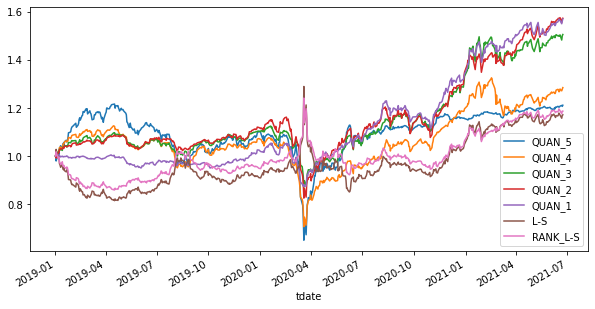

In [ ]:
daily_summary, daily_ress = get_report(score)
daily_ress.plot(figsize = (10, 5))
daily_summary


,QUAN_5,QUAN_4,QUAN_3,QUAN_2,QUAN_1,L-S,RANK_L-S
RETURN,1.205605,1.261494,1.584218,1.535270,1.476986,1.122597,1.163060
MDD,-0.429234,-0.374610,-0.178650,-0.293401,-0.246153,-0.326484,-0.244630
TURNOVER,32.802145,43.257163,52.969530,51.712376,32.889220,65.691365,51.704970
CAGR,0.064311,0.080509,0.165749,0.153617,0.138830,0.039301,0.051641
SHARPE,0.101924,0.141007,0.308988,0.247469,0.300234,0.073916,0.107325


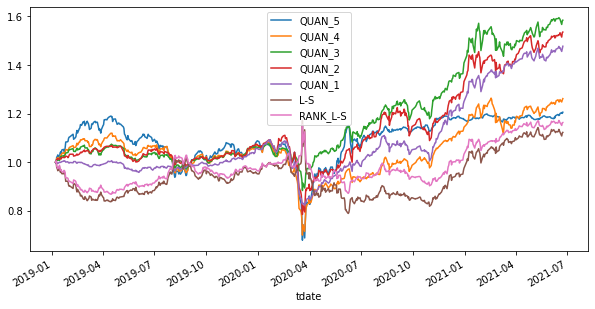

In [ ]:
weekly_summary, weekly_ress = get_report(weekly_score)
weekly_ress.plot(figsize = (10, 5))
weekly_summary

,QUAN_5,QUAN_4,QUAN_3,QUAN_2,QUAN_1,L-S,RANK_L-S
RETURN,1.136715,1.076976,1.382118,1.595125,1.593928,1.307562,1.357544
MDD,-0.428325,-0.366136,-0.209908,-0.302584,-0.260241,-0.291544,-0.204343
TURNOVER,9.953508,15.423400,18.573214,17.073675,12.698027,22.651536,18.106350
CAGR,0.043640,0.025027,0.113906,0.168418,0.168126,0.093505,0.107264
SHARPE,0.079756,0.060233,0.233588,0.268151,0.346456,0.158968,0.224881


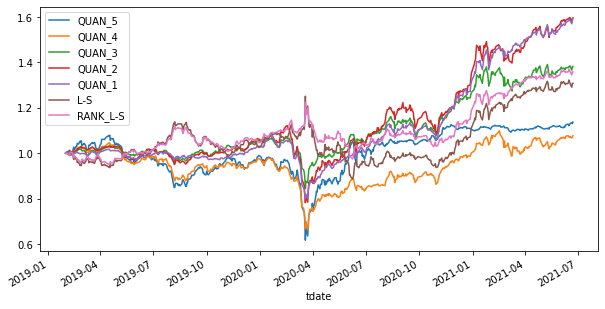

In [ ]:
monthly_summary, monthly_ress = get_report(monthly_score)
monthly_ress.plot(figsize = (10, 5))
monthly_summary

0점수화

In [ ]:
for i in range(len(columns_lst)):
        score[columns_lst[i]] = score[columns_lst[i]].apply(lambda x: 0 if x < 0 else x)

In [ ]:
score.to_csv("")

code,A091220,A091230,A098560,A102110,A105010,A114820,A117690,A123310,A123320,A130680,A133690,A137610,A138520,A138530,A138540,A139220,A139230,A139240,A139250,A139260,A139270,A139280,A139290,A139310,A139320,A143850,A143860,A147970,A150460,A157450,A157490,A157500,A160580,A166400,A174350,A182480,A182490,A192090,A195920,A195930,...,A277650,A289250,A289260,A289480,A292150,A292160,A292560,A300610,A302170,A302180,A302190,A305080,A305540,A307510,A307520,A310960,A310970,A315270,A319640,A329200,A329750,A341850,A357870,A360750,A364960,A364970,A364980,A364990,A365000,A365040,A371160,A371450,A371460,A371470,A376410,A377990,A381170,A381180,A387270,A387280
tdate,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-02,0.000000,0.000000,3.392552,0.000000,0.000000,4.811512,0.000000,4.423964,0.000000,0.000000,1.962566,0.072055,0.366376,0.000000,0.290803,0.016501,2.762139,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.516377,1.232024,0.0,0.000000,0.101800,1.794236,0.000000,0.000000,0.028611,0.039891,0.215634,3.073031,3.743302,0.000000,0.000000,1.842357,...,0.000000,0.000000,0.000000,0.838973,1.855293,0.138553,2.990104,0.292039,1.505906,1.176631,3.391917,2.547099,0.907731,1.739811,0.074157,0.000000,1.416007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,0.000000,0.000000,3.527992,0.000000,0.149869,4.840937,0.000000,4.559747,0.000000,1.316892,2.080972,0.000000,0.305678,0.000000,0.135396,0.000000,2.702136,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.446280,1.229443,0.0,1.512909,0.059526,1.757547,0.000000,0.000000,0.139954,0.050118,0.215404,4.947020,3.741579,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.003841,0.000000,0.000000,0.122319,3.128071,0.000000,1.527546,1.215684,3.423303,4.539466,0.769243,1.750843,0.201048,1.361673,1.304797,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-04,0.000000,0.000000,3.673986,0.000000,0.550900,4.861097,0.000000,4.653527,0.000000,0.000000,2.028725,0.193730,0.198361,0.000000,0.350836,0.040876,2.873631,0.0,0.000000,0.000000,0.000000,0.001519,0.000000,0.000000,0.639296,1.160415,0.0,1.693782,0.047476,1.691371,0.000000,0.000000,0.065989,0.054894,2.307090,3.002982,3.685735,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.797959,0.000000,0.127545,5.501041,0.401305,1.517737,1.217844,3.427771,2.848989,0.573925,1.514325,0.000000,1.293328,1.246417,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-07,0.000000,0.000000,5.606966,0.000000,0.467463,4.854437,0.000000,4.480330,0.000000,0.000000,1.925298,0.185857,0.076328,0.000000,0.494201,0.000000,3.014759,0.0,0.000000,0.000000,0.000000,0.035268,0.000000,0.000000,2.541845,1.044023,0.0,0.000000,0.034792,1.594325,0.000000,0.000000,0.006158,0.010227,0.294109,2.939974,3.603401,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.716534,0.000000,0.089512,3.088651,0.487971,0.000000,1.206515,3.472710,4.648358,0.630431,1.641379,2.039629,1.313800,1.248633,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-08,0.000000,0.000000,3.669577,0.000000,0.527728,4.883240,0.000000,4.446301,0.000000,0.000000,2.028906,0.184000,0.108017,0.000000,0.482851,0.000000,3.040836,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.561361,1.137015,0.0,0.000000,0.017639,1.540420,0.000000,0.000000,0.000000,0.054690,0.229996,3.016505,3.648540,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.854168,0.000000,0.141019,3.001006,0.651673,1.504502,1.205971,5.552012,2.650813,0.790909,1.710047,0.174839,1.493410,1.439276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

,QUAN_5,QUAN_4,QUAN_3,QUAN_2,QUAN_1,L-S,RANK_L-S
RETURN,1.134468,1.404321,1.485304,1.572750,1.569964,1.301933,1.191990
MDD,-0.431583,-0.404715,-0.233852,-0.289636,-0.170181,-0.209844,-0.217393
TURNOVER,88.575670,114.593680,185.210289,180.609312,118.060055,206.635725,176.479984
CAGR,0.042952,0.119839,0.140964,0.162929,0.162242,0.091934,0.060289
SHARPE,0.081110,0.174499,0.258766,0.262757,0.354410,0.157349,0.128121


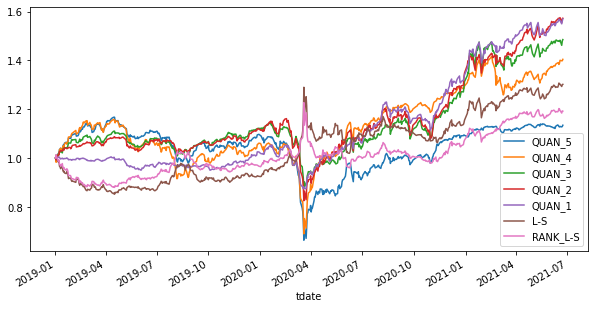

In [ ]:
daily_summary, daily_ress = get_report(score)
daily_ress.plot(figsize = (10, 5))
daily_summary

,QUAN_5,QUAN_4,QUAN_3,QUAN_2,QUAN_1,L-S,RANK_L-S
RETURN,1.205605,1.261494,1.584218,1.535270,1.476986,1.122597,1.163060
MDD,-0.429234,-0.374610,-0.178650,-0.293401,-0.246153,-0.326484,-0.244630
TURNOVER,32.802145,43.257163,52.969530,51.712376,32.889220,65.691365,51.704970
CAGR,0.064311,0.080509,0.165749,0.153617,0.138830,0.039301,0.051641
SHARPE,0.101924,0.141007,0.308988,0.247469,0.300234,0.073916,0.107325


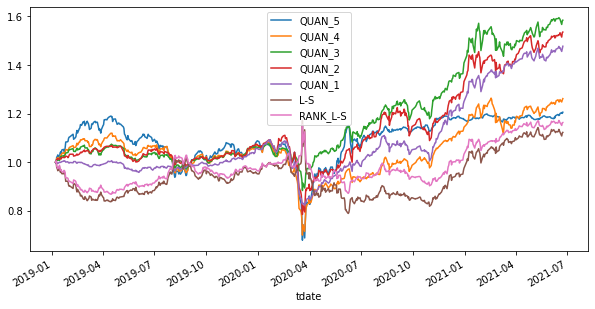

In [ ]:
weekly_summary, weekly_ress = get_report(weekly_score)
weekly_ress.plot(figsize = (10, 5))
weekly_summary

,QUAN_5,QUAN_4,QUAN_3,QUAN_2,QUAN_1,L-S,RANK_L-S
RETURN,1.136715,1.076976,1.382118,1.595125,1.593928,1.307562,1.357544
MDD,-0.428325,-0.366136,-0.209908,-0.302584,-0.260241,-0.291544,-0.204343
TURNOVER,9.953508,15.423400,18.573214,17.073675,12.698027,22.651536,18.106350
CAGR,0.043640,0.025027,0.113906,0.168418,0.168126,0.093505,0.107264
SHARPE,0.079756,0.060233,0.233588,0.268151,0.346456,0.158968,0.224881


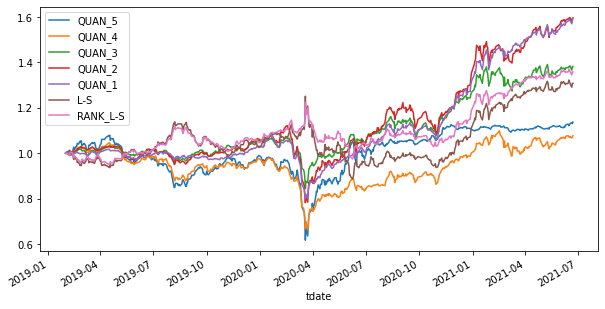

In [ ]:
monthly_summary, monthly_ress = get_report(monthly_score)
monthly_ress.plot(figsize = (10, 5))
monthly_summary